In [1]:
# These are helpful routines that will assist in building this book. 
# You should run this block before anything else. There is no output expected.
from astrodynamicsbook.bookhelpers import *
loadLatexPreamble()

# This is only here to create the navigation link:
genPrevLink()

$
\def\bs{\boldsymbol}
\def\mf{\mathbf}
\def\mb{\mathbb}
\def\mc{\mathcal}
\def\rfr{\mathcal}
\def\grad{{\rm grad}}
\def\Re{{\rm Re}}
\def\Im{{\rm Im}}
\def\und{\underline}
\def\ovl{\overline}
\def\unb{\underbrace}
\def\Log{\mbox{Log}}
\def\bfomega{\bs \omega}
\def\bfalpha{\bs \alpha}
\def\da{\triangleq}
\newcommand{\leftexp}[2]{{\vphantom{#2}}^{#1}\!{#2}}
\newcommand{\leftsub}[2]{{\vphantom{#2}}_{#1}\!{#2}}
\newcommand{\omegarot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\omega}}^{\mathcal{#2}}}}
\newcommand{\alpharot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\alpha}}^{\mathcal{#2}}}}
\newcommand{\framerot}[2]{{\leftexp{\mathcal{#1}}{C}^{\mathcal{#2}}}}
\newcommand{\dframerot}[2]{{\vphantom{\dot{C}}^{\mathcal{#1}}\!{\dot{C}^{\mathcal{#2}}}}}
\newcommand{\bdot}[1]{\dot{\mathbf{#1}}}
\newcommand{\bhat}[1]{\hat{\mathbf{#1}}}
\newcommand{\mbhat}[1]{\hat{\mathbb{#1}}}
\def\iwb{\omegarot{I}{B}}
\def\iab{\alpharot{I}{B}}
\def\icb{\framerot{I}{B}}
\def\dif{\mathop{}\!\mathrm{d}}
\newcommand{\intd}[1]{\dif#1}
\newcommand{\od}[3][]{{ \frac{\dif{^{#1}}#2}{\dif{#3^{#1}}} }}			
\newcommand{\pd}[3][]{{ \frac{\partial{^{#1}}#2}{\partial{#3^{#1}}} }}	 
\newcommand{\md}[6]{{  \frac{\partial{^{#2}}#1}{\partial{#3^{#4}}\partial{#5^{#6}}} }}
\newcommand{\fddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{#1}}{\dif{t}}}  }}
\newcommand{\fdddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{^{2}#1}}{\dif{t^2}}}  }}
\newcommand{\ddt}[1][]{\fddt[#1]{I}}
$


# [Previous](<12-Keplers Laws.ipynb>)

# The Perifocal Frame

Recall that the two-body problem is a [central force problem](<08-Angular Momentum.ipynb#Central-Force-Problems>) with two conserved vector quantities: the [specific angular momentum and the eccentricity vector](<11-Gravity.ipynb#Specific-Angular-Momentum>).  All orbital motion occurs in the plane orthogonal to the specific angular momentum, and the eccentricity vector also lies within this plane, which we will henceforth call the **perifocal plane**.  Thus, $\mf e$ and $\mf h$  are orthogonal, and if we introduce a third mutually orthogonal direction $\bhat q \triangleq \bhat h \times \bhat e$ then we can define a hugely useful reference frame:

<div class="alert alert-block alert-info">
    The <b>perifocal frame</b>: 
    $$\mc P = (\bhat{e}, \bhat{q}, \bhat{h})$$
    </div>
    
<div class="alert alert-block alert-danger">
Note how we've omitted any coordinate origin in our frame definition.  This is intentional, so as to avoid much tedious arguing about whether or not the perifocal frame is inertial.  It is.  Two of the defining unit directions are inertially fixed ($\bhat e$ and $\bhat{h}$) which means that the frame has zero angular velocity in any inertial frame.  Some conventions will place the coordinate origin of this frame at the location of the central body of the two-body orbit, and because this point has a non-zero inertial acceleration, this tends to lead to much argument and general brouhaha. And it is all entirely pointless - for our purposes, only the unit directions matter, and these are fixed within any inertial frame, and thus, the perifocal frame is inertial. If you absolutely must assign the perifocal frame a coordinate origin and cannot bear to use the location of the central body, just set it to be the barycenter of the two bodies. Basta!
    </div>

Thanks to [Kepler's first law](<12-Keplers Laws.ipynb#Kepler's-First-Law>) we know that all two-body orbits are conic sections with the central body lying at one focus, and thus we can write the position of the orbiting body (what we've been calling the [orbital radius vector](<11-Gravity.ipynb#The-Two-Body-Problem>) in components of the perifocal frame as:
$$ \mf r = r\cos(\nu) \bhat{e} + r\sin(\nu) \bhat{q}$$

$r$ and $\nu$ are always the polar coordinates of the orbital radius vector in the perifocal frame for any orbit representing any type of conic section.

We can similarly write the orbital velocity vector in components of this frame by directly differentiating the expression above:
$$ \mf v = \fddt{I} \mf r \equiv \fddt{P} \mf r = \left[ \dot r\cos(\nu) - r\dot\nu\sin(\nu)\right]\hat{\mf e} + \left[\dot r\sin(\nu) + r\dot\nu\cos(\nu)\right]\hat{\mf{q}}$$

We can simplify things a bit by solving for $\dot r$ and $\dot \nu$ in terms of other known quantities.  Starting with $\dot r$, we can take the scalar time derivative of the previously derived conic section expression:

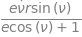

In [2]:
# First we set things up
h,mu,e,nu,nud,t,r,rd = symbols("h,mu,e,nu,nudot,t,r,rdot", real=True, positive=True)
rmag = (h**2/mu)/(1+e*cos(nu))
diffmap = {nu:nud,r:rd}
# Now we differentiate in time
dr = difftotal(rmag,t,diffmap)
# Now we subsitute in the original expression for r
dr = dr.subs(rmag,r)
dr

We thus have:
$$\dot r = r\dot\nu \frac{e \sin{\left(\nu \right)}}{1+ e \cos{\left(\nu \right)}}$$

Next, recalling that $h = \Vert \mf h \Vert = \Vert \mf r \times \mf v \Vert$, we can substitute in the component forms of the orbital radius and velocity vectors to find:

In [3]:
# Remember that component matrices of Euclidean vectors must be 3x1
rvec = Matrix([r*cos(nu),r*sin(nu),0])
vvec = difftotalmat(rvec,t,diffmap)
hvec = rvec.cross(vvec)
hmag = simplify(sqrt(hvec.dot(hvec)))
hmag

We have thus shown that $h = \dot \nu r^2$. Neat!  Plugging all of this back into the orbital velocity vector expression we started from, we have:

In [4]:
simplify(vvec.subs(rd,dr).subs(nud,h/r**2).subs(r,rmag))

⎡  -μ⋅sin(ν)   ⎤
⎢  ──────────  ⎥
⎢      h       ⎥
⎢              ⎥
⎢μ⋅(e + cos(ν))⎥
⎢──────────────⎥
⎢      h       ⎥
⎢              ⎥
⎣      0       ⎦

Summing up, we now have:

<div class="alert alert-block alert-info">
$$ \mf r = r\cos(\nu) \bhat{e} + r\sin(\nu) \bhat{q}$$
$$ \mf v = \frac{\mu}{h}\left[ -\sin(\nu) \bhat{e} + (e + \cos(\nu)) \bhat{q}\right]$$
    $$ h = r^2\dot\nu$$
    </div>

These are *hugely* useful expressions that we'll come back to again and again.

# Turning Points

In general, the angle between $\mf r$ and $\mf v$ is entirely arbitrary, but there exist special points in all orbits, called **turning points**, at which these two vectors will be orthogonal. Turning points occur when the orbital radius vector is parallel (or anti-parallel) to the eccentricity vector.  **Closed orbits** (ellipses) will have two turning points, while **open orbits** (parabolae and hyperbolae) will have only one turning point.  Circles, which in most cases can be treated as a special case of ellipse, are actually a bit different, in that, depending on how you think about it, either every point on a circular orbit is a turning point or there are no turning points.  Since a circle has zero eccentricity, the eccentricity vector is not well defined (it has zero magnitude and no fixed direction - something we'll come back to in a bit).  As such, there are no particular points on a circular orbit where we can say that the radius vector is aligned with the eccentricity vector.  On the other hand, the orbital radius and velocity vectors are mutually orthogonal at all points on a circular orbit.  We can see this by evaluating the unit vectors associated with each for the case where $e = 0$:
$$\bhat{r}_\textrm{circ} = \cos(\nu) \bhat{e} + \sin(\nu) \bhat{q}$$
$$\bhat{v}_\textrm{circ} = -\sin(\nu) \bhat{e} + \cos(\nu)\bhat{q}$$

Dotting the two together, we get: $-\cos(\nu)\sin(\nu) + \sin(\nu)\cos(\nu) = 0$, proving their orthogonality to one another.

<div class="alert alert-block alert-danger">
    Let's just get this out of the way: circular orbits are <b>boring</b>. As we progress in our understanding of two-body orbits and their propagation, we'll find, time and again, that things work out very simply in cases of circular orbits as compared with ellipses and hyperbolae.  This, and the fact that lots of natural bodies and spacecraft reside on circular or near-circular orbits, makes them highly useful.  But <i>boring</i>.
    </div>

Returning to the general case where the eccentricity vector is well-defined, let's start again with our assertion that turning points are equivalent to the orbital radius being parallel to $\mf e$.  We denote the orbital radius and velocity vectors at the turning points by $\mf r_t$ and $\mf v_t$, respectively, and write: $\mf r_t \parallel \mf e$. Recall from our [original derivation of the eccentricity vector](<11-Gravity.ipynb#The-Eccentricity-Vector>), we found:
$$\mf e = \frac{\mf v  \times \mf h}{\mu} - \bhat r $$
Substituting in $\mf h = \mf r \times \mf v$ and applying the [vector triple product](<02-Vector Products.ipynb#Vector-Triple-Product>), we get:
$$\mf e = \frac{1}{\mu}\left( \mf r\left(\mf v \cdot \mf v\right) - \mf v\left(\mf r \cdot \mf v\right)\right) - \frac{\mf r}{r} = \frac{1}{\mu}\left(v^2 - \frac{\mu}{r}\right)\mf r - \frac{\mf r \cdot \mf v}{\mu}\mf v$$
where $v \triangleq \Vert \mf v\Vert$ is the orbital velocity magnitude, or **orbital speed**.  We have therefore shown that the eccentricity vector can always be expressed as a weighted sum of the orbital radius and velocity vectors.  However, in the non-trivial case of non-zero orbital velocity, for a turning point where the orbital radius and eccentricity vector are parallel, the component of the eccentricity vector in the velocity vector must be zero.  Or, equivalently, we have found that:
$$ \mf r_t \cdot \mf v_t = 0$$
confirming that at turning points the orbital radius and velocity vectors are orthogonal.

We can also compute the magnitudes of the two vectors at the turning points.  For the velocity vector, we rewrite the eccentricity vector expression as:
$$\frac{\mf v  \times \mf h}{\mu} = \mf e + \bhat{r}$$
and cross both sides with $\bhat{h}$ to find:
$$\frac{\mf h}{h} \times \frac{\mf v  \times \mf h}{\mu}  =  \underbrace{\left(\mf h \cdot \mf h\right)}_{\displaystyle \equiv h^2}\frac{\mf v}{h\mu} - \underbrace{\left(\mf h \cdot \mf v\right)}_{\displaystyle \equiv 0}\frac{\mf h}{h\mu} =  \frac{\mf h}{h} \times \left(\mf{e} + \bhat{r}\right)$$
where we have once again applied the vector triple product to the left-hand side and noted that $\mf h$ and $\mf v$ are orthogonal. We can thus write the orbital velocity vector as:

<div class="alert alert-block alert-info">
$$ \mf v = \frac{\mu}{h} \left(  \bhat{h} \times \left(\mf{e} + \bhat{r}\right) \right) $$
</div>

Yes, this is sufficiently useful to warrant its own blue box.  Don't be like that.  Returning to the specific case of turning points, we note that $\bhat{r}_t \equiv \pm\bhat{e}$ (the $\pm$ due to the fact that the two vectors can be parallel or anti-parallel) and that we can always write $\mf e = e \bhat{e}$, we find:
$$\mf v_t = \frac{\mu}{h} \left( \bhat{h} \times \left(e\bhat{e} \pm \bhat{e}\right) \right) = \frac{\mu}{h}(e \pm 1) \underbrace{\bhat{h}\times \bhat{e}}_{\displaystyle\equiv \bhat{q}}$$

This again confirms that $\mf r_t \perp \mf v_t$ (since $\bhat{q}$ is orthogonal to $\bhat{e}$), but much more interestingly, by comparing this expression to the general velocity vector written in components of the perifocal frame, we see that the turning points must occur with $\nu = 0,\pi$ (these are the only locations where $\sin(\nu) = 0$ and there is no component in the $\bhat{e}$ direction.  As you've probably already noticed, the turning points are the [apsides](<12-Keplers Laws.ipynb#Apsides>)!

This is easily confirmed by the geometry of our orbits and the conic section solution for the orbital radius magnitude.  Remember that $\nu$ is the angle between $\mf r$ and $\mf e$, meaning that $\mf r_t \parallel \mf e$ requires $\nu_t = 0,\pi$. The orbital radius at these points evaluates to:
$$r_t = \frac{\ell}{1 \pm e}$$
Since the semi-parameter is a constant, these two points correspond to the maximum and minimum separations between the two bodies.  In the case of open orbits, only the periapsis lies on the orbit, as the apoapsis lies at infinity. 

<div class="alert alert-block alert-danger">
    This does not mean, however, that a body on an open orbit must necessarily cross periapsis.  If the body was injected onto the orbit <i>after</i> the periapsis point (as in the case of a maneuvering spacecraft or a natural body whose orbit is being modified by some external forces), then it will simply continue receeding from the central body for all time (or until the orbit is modified again).
    </div>

In [12]:
# This is just here to generate the link to the next notebook
genNextLink()

# [Next](<14-Keplers Laws Continued.ipynb>)